# SEANCE 6 - Statistiques inférentielles et régression linéaire
## Du coefficient de corrélation aux tests et à la régression

---

## 1. Pourquoi des statistiques inférentielles ?

En ingénierie, **on ne dispose jamais de la population complète** :
- nombre limité d’essais
- contraintes de coût, de temps, de matériel
- phénomènes soumis à de la variabilité

Les statistiques inférentielles permettent de :
- **estimer** des grandeurs populationnelles **à partir d’un échantillon**
- **quantifier l’incertitude** associée à ces estimations
- **prendre une décision** à partir de données bruitées

---

## 2. Rappel : corrélation ≠ causalité

Le coefficient de corrélation (ex. Pearson) mesure :
- la force du lien linéaire
- le sens du lien (positif ou négatif)

Mais :
- une corrélation élevée n’implique pas une relation de cause à effet
- la corrélation est descriptive, pas décisionnelle
### Exemple : corrélation élevée ≠ causalité

On observe une forte corrélation entre :
- la consommation de glaces
- le nombre de noyades accidentelles

Le coefficient de corrélation est élevé et positif.(~0.9)

Mauvaise interprétation :
> consommer des glaces provoque des noyades

Cette conclusion est fausse.

Explication correcte :
- une variable cachée intervient : la température
- quand il fait chaud :
  - on consomme plus de glaces
  - on se baigne davantage, ce qui augmente le risque de noyade

La température est une cause commune aux deux phénomènes.

Conclusion :
- **une corrélation élevée indique que deux variables varient ensemble**
- elle ne permet pas, à elle seule, d’établir un lien de cause à effet
- la causalité nécessite une analyse physique et expérimentale du système


---

## 3. Échantillon, population et variabilité

### 3.1 Population et échantillon

- **Population** : ensemble théorique de toutes les valeurs possibles
- **Échantillon** : sous-ensemble mesuré expérimentalement

Les statistiques calculées sur un échantillon sont aléatoires :
une autre campagne de mesures produirait des résultats différents.

---

### 3.2 Statistiques usuelles

Pour une variable mesurée \( Y \) :

- moyenne :
$$
\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i
$$

- écart-type (échantillon) :
$$
s = \sqrt{\frac{1}{n-1}\sum (y_i - \bar{y})^2}
$$

L’écart-type mesure la dispersion des valeurs, pas l’incertitude sur la moyenne.
<details>
<summary><b>Explication division par $(n-1)$ au lieu de $n$</b></summary>

## Pourquoi divise-t-on par $n-1$ pour l’écart-type de l’échantillon ?

L’écart-type de l’échantillon est défini par :
$$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

La présence de $n-1$ (et non \(n\)) est essentielle en statistiques inférentielles.

---

## 1. Le problème de la moyenne inconnue

Dans la population, la variance vraie est définie par :
$$
\sigma^2 = \frac{1}{n}\sum (y_i - \mu)^2
$$

Mais en pratique :
- la moyenne populationnelle $\mu $ est inconnue
- elle est remplacée par la moyenne de l’échantillon $ \bar{y} $

Cette substitution introduit un biais.

---

## 2. Perte d’un degré de liberté

Les écarts à la moyenne vérifient toujours :
$$
\sum_{i=1}^{n} (y_i - \bar{y}) = 0
$$

Cela signifie que :
- les $n$ écarts ne sont pas indépendants
- si $n-1$ écarts sont connus, le dernier est imposé

Il n’y a donc que :
$$
n - 1 \quad \text{degrés de liberté}
$$

---

## 3. Biais si l’on divisait par $n$

Si l’on divisait par $n$ :
- la dispersion serait systématiquement sous-estimée
- les intervalles de confiance seraient trop étroits
- les tests statistiques seraient trop optimistes

Diviser par $n-1$ corrige ce biais.

---

## 4. Interprétation intuitive

Calculer la dispersion autour d’une moyenne estimée donne l’illusion que les données sont plus regroupées qu’elles ne le sont réellement.

Le facteur $n-1$ compense cette contrainte artificielle.

---

## 5. Conséquence importante

Avec cette définition :
$$
\mathbb{E}[s^2] = \sigma^2
$$

L’estimateur de la variance est non biaisé, ce qui est indispensable pour :
- les intervalles de confiance
- les tests t de Student
- l’inférence statistique en général

---

## Message clé à retenir

> Le $n-1$ reflète le nombre réel de degrés de liberté  
> après l’estimation de la moyenne à partir des données.

</details>

---

## 4. Incertitude sur une estimation : erreur standard

### 4.1 Erreur standard de la moyenne

L’erreur standard quantifie l’incertitude sur la moyenne estimée :

$$
SE = \frac{s}{\sqrt{n}}
$$

- \( s \) : variabilité des mesures
- \( n \) : taille de l’échantillon

**Quand le nombre de mesures augmente, l’incertitude sur la moyenne diminue.**




In [ ]:
#import des librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#librairie scipy pour test d'hypothèses, intervalles de confiance
from scipy import stats
#bibliothèque pour estimation de modèle statistique (régression linéaire)
import statsmodels.api as sm
#simplifie les formules comme le régression
import statsmodels.formula.api as smf


In [ ]:
#simuler un jeu de données (contrainte/déformation) on étudie la déformation en fonction d'une contrainte
np.random.seed(42)

n = 30
x = np.linspace(0, 10, n)                  # ex : contrainte (MPa) normalisée
true_slope = 2.5                           # ex : sensibilité
true_intercept = 1.0
noise = np.random.normal(0, 2.0, n)        # bruit de mesure
y = true_intercept + true_slope*x + noise  # ex : déformation (unité arbitraire)

df = pd.DataFrame({"x": x, "y": y})
df.head()


,x,y
0,0.000000,1.993428
1,0.344828,1.585540
2,0.689655,4.019515
3,1.034483,6.632267
4,1.379310,3.979969


          x         y
x  1.000000  0.971833
y  0.971833  1.000000


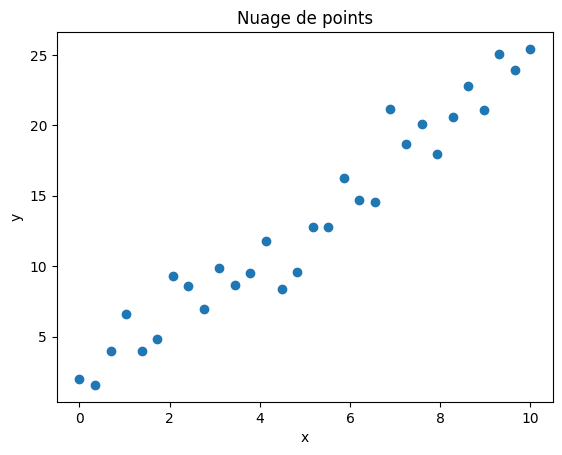

In [ ]:
#visualisation
c = df.corr()
print(c)
plt.figure()
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nuage de points")
plt.show()


In [ ]:
y_mean = df["y"].mean()                     #moyenne de l'échantillon
y_std = df["y"].std(ddof=1)                 # écart-type échantillon
se = y_std / np.sqrt(n)                     # standard error (sqrt = racine carrée)

print("moyenne =", y_mean)
print("écart-type =", y_std)
print("erreur standard =", se)


moyenne = 13.123706208297929
écart-type = 7.172474922032704
erreur standard = 1.3095087693124732


## 5. Intervalle de confiance (IC)

### 5.1 Principe

Un intervalle de confiance **à 95 %** est un intervalle construit à partir des données tel que :

si l’expérience était répétée un grand nombre de fois,  
95 % des intervalles contiendraient la vraie valeur populationnelle.

Ce n’est pas une probabilité sur la valeur du paramètre.

---

### 5.2 IC sur la moyenne (loi de Student)

Lorsque la variance populationnelle est inconnue :

$$
IC_{95\%} = \bar{y} \pm t_{0.975,\,n-1}\frac{s}{\sqrt{n}}
$$

où $ t_{0.975,n-1} $ est un quantile de la loi de Student à \( n-1 \) degrés de liberté.

Plus \( n \) augmente, plus l’intervalle se resserre.


In [ ]:
alpha = 0.05 #car 1-0.95 (95%)
t_crit = stats.t.ppf(1 - alpha/2, df=n-1) #donne la valeur de T0.975
ci_low = y_mean - t_crit*se #borne inf de l'intervalle
ci_high = y_mean + t_crit*se #borne sup de l'intervalle

print(f"IC 95% de la moyenne: [{ci_low:.3f}, {ci_high:.3f}]")


IC 95% de la moyenne: [10.445, 15.802]


## Interprétation simple d’un intervalle de confiance (avant les tests)

On dispose d’un intervalle de confiance à 95 % pour la moyenne d’un phénomène :
$$
IC_{95\%}(\mu) = [10.445 \; ; \; 15.802]
$$

---

## Que signifie cet intervalle ?

À partir des données mesurées, on estime que la moyenne réelle du phénomène est
compatible avec toutes les valeurs comprises entre **10.445** et **15.802**.

Les valeurs situées en dehors de cet intervalle sont peu compatibles avec les données
au niveau de confiance de 95 %.

---

## Comparaison simple avec une autre valeur

Sans utiliser encore de test statistique formel, on peut faire les lectures suivantes.

### Cas 1 : valeur de référence dans l’intervalle
Exemple : valeur théorique $ \mu_0 = 12 $

Comme $ 12 \in [10.445 ; 15.802] $, les données sont compatibles avec la valeur
de référence.

On ne met pas en évidence d’écart clair entre la moyenne mesurée et la valeur attendue.

---

### Cas 2 : valeur de référence hors de l’intervalle
Exemple : valeur $ \mu_0 = 18 $

Comme $18 \notin [10.445 ; 15.802] $, les données ne sont pas compatibles avec
cette valeur au niveau de confiance de 95 %.

L’écart observé est trop important pour être attribué uniquement au hasard des mesures.

---

## Ce que cette lecture permet déjà

- comparer une moyenne mesurée à une valeur de référence
- évaluer si un écart est plausible compte tenu de l’incertitude
- raisonner sans encore introduire de tests statistiques formels

---

## Limite importante

Cette interprétation est **qualitative** :
- elle ne remplace pas un test d’hypothèses
- elle ne permet pas de comparer rigoureusement deux échantillons

Ces points seront traités dans la suite avec les tests statistiques.

---

## Message clé

> Un intervalle de confiance permet de dire  
> quelles valeurs sont compatibles avec les données,  
> avant même d’introduire la notion de test.
> Plus on augmente la taille de l'échantillon est grand plus l'intervalle est précis autour de la moyenne (incertitude diminue)


## 6. Logique des tests d’hypothèses

### 6.1 Hypothèses

Un test statistique repose sur deux hypothèses :

- **H₀ (hypothèse nulle)** : absence d’effet ou de différence ($H_0$
 est l’hypothèse de référence, de statu quo, d’absence d’amélioration, de changement.)
- **H₁ (hypothèse alternative)** : présence d’un effet ou d’une différence

En statistique :


 - $𝐻_0$ =  statu quo / pas d’effet / pas d’amélioration
	​

 - $H_1$ = effet que l’on cherche à démontrer

Exemples :
- H₀ : la moyenne vaut une valeur de référence
- H₀ : deux procédés ont la même performance
- H₀ : la corrélation populationnelle est nulle


### 6.1.1 Tests bilatéral et unilatéral : comprendre le sens du test

Lorsqu’on met en place un test statistique, il est indispensable de préciser
**dans quel sens** on cherche un effet.
Ce choix détermine le type de test.

---

### 6.1.1.1. Test bilatéral

#### Définition
Un test bilatéral cherche à détecter **toute différence**, quelle que soit sa direction.

### Hypothèses
$$
H_0 : \mu = \mu_0
$$
$$
H_1 : \mu \neq \mu_0
$$

### Interprétation
- on rejette $H_0$ si la valeur observée est **trop grande ou trop petite**
- le risque $\alpha$ est réparti des deux côtés de la distribution  
  (par exemple 2,5 % de chaque côté pour $\alpha = 5\%$)

### Quand l’utiliser ?
- comparaison à une valeur de référence sans a priori
- détection de dérive
- contrôle qualité

---

## 6.1.1.2. Test unilatéral à droite

### Définition
Un test unilatéral à droite cherche à détecter une **augmentation**.

### Hypothèses
$$
H_0 : \mu \le \mu_0
$$
$$
H_1 : \mu > \mu_0
$$

### Interprétation
- on rejette $H_0$ uniquement pour des valeurs **trop grandes**
- tout le risque $\alpha$ est placé dans la **queue droite**

### Quand l’utiliser ?
- validation d’une amélioration
- performance minimale à dépasser
- gain attendu

---

## 6.1.1.3. Test unilatéral à gauche

### Définition
Un test unilatéral à gauche cherche à détecter une **diminution**.

### Hypothèses
$$
H_0 : \mu \ge \mu_0
$$
$$
H_1 : \mu < \mu_0
$$

### Interprétation
- on rejette $H_0$ uniquement pour des valeurs **trop petites**
- tout le risque $\alpha$ est placé dans la **queue gauche**

### Quand l’utiliser ?
- dégradation attendue
- seuil maximal à ne pas dépasser
- perte de performance

---

## 6.1.1.4. Règle essentielle

> Le type de test doit être choisi **avant** l’analyse des données,  
> en fonction de la question posée, et non des résultats observés.

---

## 6.1.1.5. Résumé

| Type de test | Hypothèse alternative | Sens de la décision | Question posée |
|------------|----------------------|--------------------|----------------|
| Bilatéral | $\mu \neq \mu_0$ | Deux côtés | Y a-t-il une différence ? |
| Unilatéral à droite | $\mu > \mu_0$ | Valeurs grandes | Y a-t-il une augmentation ? |
| Unilatéral à gauche | $\mu < \mu_0$ | Valeurs petites | Y a-t-il une diminution ? |

---

## Message clé à retenir

> Le choix entre test bilatéral et unilatéral dépend exclusivement  
> de la **question scientifique ou technique**, pas des données.


## Exercice – Formuler les hypothèses \(H_0\) et \(H_1\) (avec correction)

---

### Situation 1 – Comparaison à une valeur de référence

Un constructeur annonce que la durée de vie moyenne d’un composant est de **12 000 h**.

<details>
<summary>Afficher la réponse</summary>

- $H_0$ : la durée de vie moyenne vaut 12 000 h  
$$
H_0 : \mu = 12\,000
$$

- $H_1$ : la durée de vie moyenne est différente de 12 000 h  
$$
H_1 : \mu \neq 12\,000
$$

Il s’agit d’un test **bilatéral**.

</details>

---

### Situation 2 – Détection d’une dérive

Un capteur est supposé mesurer une grandeur avec une moyenne égale à **0** après étalonnage.

<details>
<summary>Afficher la réponse</summary>

- $H_0$ : la moyenne est égale à 0  
$$
H_0 : \mu = 0
$$

- $H_1$ : la moyenne est différente de 0  
$$
H_1 : \mu \neq 0
$$

On cherche à détecter toute dérive, positive ou négative.

</details>

---

### Situation 3 – Amélioration d’un procédé

Un nouveau procédé est censé **augmenter** la durée de vie moyenne par rapport à l’ancien.

<details>
<summary>Afficher la réponse</summary>

Soit $\mu_{\text{nouveau}}$ la moyenne du nouveau procédé  
et $\mu_{\text{ancien}}$ celle de l’ancien.

- $H_0$ : le nouveau procédé n’améliore pas la durée de vie  
$$
H_0 : \mu_{\text{nouveau}} \le \mu_{\text{ancien}}
$$

- $H_1$ : le nouveau procédé augmente la durée de vie  
$$
H_1 : \mu_{\text{nouveau}} > \mu_{\text{ancien}}
$$

Il s’agit d’un test **unilatéral à droite**.

</details>

---

### Situation 4 – Comparaison de deux procédés

Deux procédés A et B sont utilisés pour fabriquer une même pièce.

<details>
<summary>Afficher la réponse</summary>

- $H_0$ : les deux procédés ont la même durée de vie moyenne  
$$
H_0 : \mu_A = \mu_B
$$

- $H_1$ : les durées de vie moyennes sont différentes  
$$
H_1 : \mu_A \neq \mu_B
$$

Il s’agit d’un test **bilatéral**.

</details>

---

### Situation 5 – Lien entre deux variables

On étudie la relation entre la température et la durée de vie d’un composant.

<details>
<summary>Afficher la réponse</summary>

Soit $\rho$ la corrélation populationnelle.

- $H_0$ : il n’existe pas de lien linéaire  
$$
H_0 : \rho = 0
$$

- $H_1$ : il existe un lien linéaire  
$$
H_1 : \rho \neq 0
$$

Cette formulation correspond au test de corrélation de Pearson.

</details>

---

## Message clé à retenir

> La formulation de $H_0$ et $H_1$ dépend toujours  
> de la **question posée**, pas de la méthode de calcul.



### 6.2 p-value et décision


#### 6.2.1 Comment obtient-on une p-value ?


#####  Définition

La p-value est :

> la probabilité d’observer un résultat au moins aussi extrême que celui mesuré  
> **en supposant que l’hypothèse nulle $H_0$ est vraie**

Elle est toujours calculée **sous l’hypothèse $H_0$**.

---

#### 6.2.2 Étapes générales (valables pour tous les tests)

##### 6.2.1.1 Formuler les hypothèses
On définit :
- $H_0$ : hypothèse de référence (pas d’effet)
- $H_1$ : hypothèse alternative (effet recherché)

Le type de test (bilatéral ou unilatéral) est fixé ici.

---

##### 6.2.1.2 Choisir une statistique de test
On construit une statistique :
- calculée à partir des données
- dont la loi est connue si $H_0$ est vraie

Exemples :
- statistique $t$ (tests de moyenne, régression)
- statistique liée à $r$ (corrélation)

---

##### 6.2.1.3 Calculer la valeur observée
On calcule la valeur observée de la statistique, notée par exemple :
$$
t_{\text{obs}}
$$

Cette valeur mesure l’écart entre les données et ce que prévoit $H_0$.

Le calcul statistique de test $t_{\text{obs}}$ selon la situation

La statistique $t_{\text{obs}}$ mesure toujours :
> **un écart observé rapporté à son incertitude**

Sa formule dépend du type de test effectué.

---

<details>
<summary><strong>1️⃣ Test t à un échantillon</strong></summary>

### Situation  
On compare la moyenne d’un échantillon à une valeur de référence $\mu_0$.

### Hypothèses
$$
H_0 : \mu = \mu_0
$$

### Formule
$$
t_{\text{obs}} = \frac{\bar{y} - \mu_0}{s / \sqrt{n}}
$$

### Signification des termes
- $\bar{y}$ : moyenne de l’échantillon  
- $\mu_0$ : valeur de référence  
- $s$ : écart-type de l’échantillon  
- $n$ : taille de l’échantillon  

👉 On mesure l’écart à la référence en nombre “d’erreurs standards”.

</details>

---

<details>
<summary><strong>2️⃣ Test t à deux échantillons indépendants (Welch)</strong></summary>

### Situation  
On compare les moyennes de deux échantillons indépendants.

### Hypothèses
$$
H_0 : \mu_1 = \mu_2
$$

### Formule
$$
t_{\text{obs}} =
\frac{\bar{y}_1 - \bar{y}_2}
{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

### Signification
- $\bar{y}_1, \bar{y}_2$ : moyennes  
- $s_1, s_2$ : écarts-types  
- $n_1, n_2$ : tailles d’échantillons  

👉 L’écart entre moyennes est comparé à la variabilité combinée.

</details>

---

<details>
<summary><strong>3️⃣ Test t apparié (avant / après)</strong></summary>

### Situation  
Les mesures sont faites sur les mêmes pièces ou individus.

### Principe  
On calcule les différences :
$$
d_i = y_{i,\text{après}} - y_{i,\text{avant}}
$$

### Formule
$$
t_{\text{obs}} = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

- $\bar{d}$ : moyenne des différences  
- $s_d$ : écart-type des différences  

👉 C’est un test à un échantillon appliqué aux différences.

</details>

---

<details>
<summary><strong>4️⃣ Test de corrélation (Pearson)</strong></summary>

### Situation  
On teste l’existence d’un lien linéaire réel.

### Hypothèses
$$
H_0 : \rho = 0
$$

### Formule
$$
t_{\text{obs}} = r \sqrt{\frac{n - 2}{1 - r^2}}
$$

### Signification
- $r$ : corrélation observée sur l’échantillon  
- $n$ : taille de l’échantillon  

👉 Cette formule permet de transformer une corrélation en statistique de test.

</details>

---

<details>
<summary><strong>5️⃣ Test de la pente en régression linéaire</strong></summary>

### Situation  
On teste l’effet linéaire d’une variable explicative.

### Hypothèses
$$
H_0 : b = 0
$$

### Formule
$$
t_{\text{obs}} = \frac{\hat{b}}{\text{SE}(\hat{b})}
$$

### Signification
- $\hat{b}$ : pente estimée  
- $\text{SE}(\hat{b})$ : erreur standard de la pente  

👉 On teste si la pente est significativement différente de zéro.

</details>

---

## Message clé à retenir

> Quelle que soit la situation,  
> $t_{\text{obs}}$ est toujours un **écart normalisé par son incertitude**.


---

##### 6.2.1.4 Utiliser la loi sous $H_0$
Sous $H_0$, la statistique suit une loi connue
(par exemple une loi de Student).

---

##### 6.2.1.5 Calculer la p-value

- test bilatéral :
$$
\text{p-value} = \mathbb{P}(|T| \ge |t_{\text{obs}}| \mid H_0)
$$

- test unilatéral à droite :
$$
\text{p-value} = \mathbb{P}(T \ge t_{\text{obs}} \mid H_0)
$$

- test unilatéral à gauche :
$$
\text{p-value} = \mathbb{P}(T \le t_{\text{obs}} \mid H_0)
$$

---

#### 6.3 Interprétation

- p-value petite → données peu compatibles avec $H_0$
- p-value grande → données compatibles avec $H_0$

La p-value ne donne pas la probabilité que $H_0$ soit vraie.

<details><summary><strong>Explications intuitives</stron></summary>

## Intuition de la p-value (sans formules)

La p-value est souvent contre-intuitive.  
Cette section vise à comprendre **le raisonnement**, pas à faire des calculs.

---

## Ce que mesure réellement la p-value

La p-value est :

> la probabilité d’observer un résultat au moins aussi extrême que celui mesuré  
> **en supposant que l’hypothèse nulle $H_0$ est vraie**

Point fondamental :
- on se place **dans un monde où $H_0$ est vraie**
- on se demande si ce que l’on observe serait **fréquent ou rare** dans ce monde

---

## Pourquoi une p-value petite remet en cause $H_0$

### p-value petite

Dire que la p-value est petite signifie :

> *Si $H_0$ était vraie, le résultat observé serait très rare.*

On raisonne alors ainsi :
- soit on a observé un événement extrêmement improbable
- soit l’hypothèse $H_0$ n’est probablement pas correcte

On choisit la seconde explication :  
👉 **les données contredisent $H_0$**.

---

### p-value grande

Dire que la p-value est grande signifie :

> *Si $H_0$ était vraie, le résultat observé serait courant.*

Dans ce cas :
- les données ne surprennent pas
- elles sont compatibles avec $H_0$

👉 **on ne remet pas $H_0$ en cause**.

---

## Point clé pour éviter la confusion

> La p-value ne mesure pas la probabilité que $H_0$ soit vraie.  
> Elle mesure à quel point les données seraient surprenantes **si $H_0$ était vraie**.

---

## Résumé en une phrase

- p-value petite → résultat très rare sous $H_0$ → $H_0$ peu crédible  
- p-value grande → résultat courant sous $H_0$ → données compatibles avec $H_0$

---

## Message clé à retenir

> On ne rejette pas $H_0$ parce que le résultat est extrême,  
> mais parce qu’il serait **trop improbable si $H_0$ était vraie**.
</details>

---

#### 6.4 Message clé

> La p-value quantifie à quel point les données contredisent $H_0$,
> en supposant que $H_0$ est vraie.


## Mini-exercice – Comprendre la p-value sans calcul

Pour chaque situation, répondre par **OUI** ou **NON**, puis justifier en une phrase.

---

### Situation 1
On obtient une p-value de 0,60.

Question :  
Les données sont-elles surprenantes si $H_0$ est vraie ?

Réponse attendue :  
- ☐ OUI  
- ☐ NON  

<details>
<summary>Afficher la correction</summary>

**Réponse : NON**

Une p-value de 0,60 est grande.  
Cela signifie que, si $H_0$ est vraie, un résultat comme celui observé est fréquent.

Les données ne sont donc pas surprenantes sous $H_0$.

</details>

---

### Situation 2
On obtient une p-value de 0,01.

Question :  
Le résultat observé serait-il fréquent si $H_0$ était vraie ?

Réponse attendue :  
- ☐ OUI  
- ☐ NON  

<details>
<summary>Afficher la correction</summary>

**Réponse : NON**

Une p-value de 0,01 est très petite.  
Si $H_0$ était vraie, un tel résultat serait très rare.

Le résultat observé n’est donc pas fréquent sous $H_0$.

</details>

---

### Situation 3
On obtient une p-value de 0,03 avec un seuil de 5 %.

Question :  
Les données sont-elles compatibles avec $H_0$ au niveau 5 % ?

Réponse attendue :  
- ☐ OUI  
- ☐ NON  

<details>
<summary>Afficher la correction</summary>

**Réponse : NON**

La p-value est inférieure à 0,05.  
Les données sont donc peu compatibles avec $H_0$ au niveau de confiance de 95 %.

On rejette $H_0$ au seuil de 5 %.

</details>

---

### Situation 4
On obtient une p-value de 0,45.

Question :  
Peut-on conclure que $H_0$ est fausse ?

Réponse attendue :  
- ☐ OUI  
- ☐ NON  

<details>
<summary>Afficher la correction</summary>

**Réponse : NON**

Une p-value de 0,45 indique que les données sont compatibles avec $H_0$.

On ne peut pas conclure que $H_0$ est fausse.  
On se contente de dire que les données ne la contredisent pas.

</details>


---

## Indication méthodologique

Une p-value :
- petite → données surprenantes sous $H_0$
- grande → données non surprenantes sous $H_0$

## Message clé à retenir

> Une p-value ne permet jamais de prouver que $H_0$ est vraie.  
> Elle permet seulement d’évaluer à quel point les données la contredisent.


## Exercice Python – Comprendre la p-value par simulation (test t à 1 échantillon)

### Objectif
Comprendre concrètement pourquoi :
- p-value petite → résultat rare si $H_0$ est vraie
- p-value grande → résultat courant si $H_0$ est vraie

### Idée
1) On calcule une statistique observée $t_{\text{obs}}$ sur un échantillon.
2) On suppose $H_0$ vraie (moyenne $\mu_0$).
3) On simule un grand nombre d’échantillons sous $H_0$ et on calcule leur statistique $t$.
4) La p-value est la proportion de statistiques simulées "au moins aussi extrêmes" que $t_{\text{obs}}$.

### Hypothèses
- $H_0 : \mu = \mu_0$
- test bilatéral : $H_1 : \mu \neq \mu_0$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

# Données observées (exemple) : remplace par tes mesures
y_obs = np.array([13.2, 12.5, 14.1, 11.8, 13.7, 12.9, 13.0, 14.0, 12.2, 13.4])

mu0 = 12.0  # valeur de référence sous H0

n = len(y_obs)
ybar = y_obs.mean()
s = y_obs.std(ddof=1)

t_obs = (ybar - mu0) / (s / np.sqrt(n))

print(f"n = {n}")
print(f"moyenne observée = {ybar:.3f}")
print(f"écart-type échantillon = {s:.3f}")
print(f"t_obs = {t_obs:.3f}")


n = 10
moyenne observée = 13.080
écart-type échantillon = 0.758
t_obs = 4.503


In [ ]:
#p-value analytique par formule + loi de student
df = n - 1
p_value_analytique = 2 * (1 - stats.t.cdf(abs(t_obs), df=df))  # bilatéral

print(f"p-value (analytique, bilatéral) = {p_value_analytique:.6f}")


p-value (analytique, bilatéral) = 0.001482


In [ ]:
#p-value par simulation (Monte Carlo)
B = 20000  # nombre de simulations

t_sim = np.empty(B)

for b in range(B):
    y = np.random.normal(loc=mu0, scale=s, size=n)  # échantillon simulé sous H0
    ybar_b = y.mean()
    s_b = y.std(ddof=1)
    t_sim[b] = (ybar_b - mu0) / (s_b / np.sqrt(n))

p_value_sim = np.mean(np.abs(t_sim) >= abs(t_obs))  # bilatéral

print(f"p-value (simulation, bilatéral) = {p_value_sim:.6f}")


p-value (simulation, bilatéral) = 0.001250


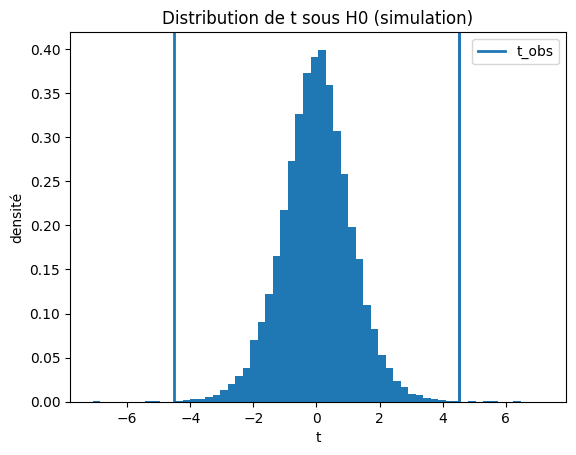

In [ ]:
#visualisation rare sous H0
plt.figure()
plt.hist(t_sim, bins=60, density=True)
plt.axvline(t_obs, linewidth=2, label="t_obs")
plt.axvline(-abs(t_obs), linewidth=2)
plt.axvline(abs(t_obs), linewidth=2)
plt.title("Distribution de t sous H0 (simulation)")
plt.xlabel("t")
plt.ylabel("densité")
plt.legend()
plt.show()


## Interprétation attendue :

- si t_obs est très loin du centre, très peu de simulations dépassent cette valeur → p-value petite

- si t_obs est proche du centre, beaucoup de simulations la dépassent → p-value grande

Ici on observe $t_{obs}$ loin du centre donc p-value petite donc données surprenante sous $H_0$

### Questions
1) Que se passe-t-il pour la p-value si on augmente $n$ en gardant le même écart $\bar{y}-\mu_0$ ?
2) Que se passe-t-il pour la p-value si on augmente la variabilité $s$ ?
3) Refaire l’exercice avec $\mu_0 = 13.0$ : la conclusion change-t-elle ?



## Correction – Interprétation des mini-questions (p-value)

---

### Question 1  
Que se passe-t-il pour la p-value si on augmente $n$ en gardant le même écart $\bar{y} - \mu_0$ ?

<details>
<summary>Afficher la réponse</summary>

👉 **La p-value diminue.**

Quand la taille de l’échantillon $n$ augmente :
- l’erreur standard $s / \sqrt{n}$ diminue
- la statistique $|t_{\text{obs}}|$ augmente

Le même écart devient donc **plus difficile à expliquer par le hasard**.

**Interprétation :**  
avec plus de données, on est plus précis et plus exigeant statistiquement.

</details>

---

### Question 2  
Que se passe-t-il pour la p-value si on augmente la variabilité $s$ ?

<details>
<summary>Afficher la réponse</summary>

👉 **La p-value augmente.**

Quand la variabilité des données augmente :
- le bruit masque davantage l’effet observé
- le même écart à la moyenne devient moins surprenant

La statistique $|t_{\text{obs}}|$ diminue.

**Interprétation :**  
plus les données sont dispersées, moins un écart est convaincant.

</details>

---

### Question 3  
Refaire l’exercice avec $\mu_0 = 13.0$ : la conclusion change-t-elle ?

<details>
<summary>Afficher la réponse</summary>

👉 **Oui, la p-value augmente fortement.**

La moyenne observée $\bar{y}$ est proche de 13.0 :
- l’écart $\bar{y} - \mu_0$ est faible
- le résultat est très plausible sous $H_0$

**Conclusion :**  
les données sont compatibles avec $H_0$, on ne le rejette pas.

</details>

---

### Question 4  
Passer à un test unilatéral à droite ($H_1 : \mu > \mu_0$). Que se passe-t-il ?

<details>
<summary>Afficher la réponse</summary>

👉 **La p-value est plus petite** (environ divisée par 2 si $t_{\text{obs}} > 0$).

En test unilatéral :
- on ne regarde qu’un seul côté de la distribution
- on concentre tout le risque $\alpha$ dans une seule queue

**Attention :**  
le type de test doit être choisi **avant** d’analyser les données.

</details>

---

## Message clé à retenir

> La p-value ne dépend pas uniquement des données,  
> mais aussi de la taille de l’échantillon,  
> de la variabilité et du type de test choisi.


## Exercice d’autonomie – Intervalle de confiance et p-value  
### Étude d’un capteur de température

**à faire sur un notebook à part et envoyer par mail le lien partagé à frederique.beaudeux@univ-lorraine.Fr**

On veut vérifier qu'un four qu'on programme sur **100°C** atteint bien cette température annoncée par le constructeur
Lors d’un essai en laboratoire on veut vérifier cette température de référence.

Un ingénieur réalise une série de mesures avec ce capteur et obtient
les valeurs suivantes (en °C) :

[101.2, 99.8, 100.5, 101.0, 99.6, 100.9, 100.1, 101.3, 99.9, 100.7]


On suppose que les erreurs de mesure sont approximativement normales.

---

### Partie A – Estimation et incertitude

1) Calculer la moyenne et l’écart-type de l’échantillon.  
2) Construire l’intervalle de confiance à 95 % de la moyenne mesurée.  
3) Interpréter cet intervalle avec une phrase correcte.

---

### Partie B – Lecture intuitive avant le test

4) La température de référence (100 °C) appartient-elle à l’intervalle de confiance ?  
5) Sans calculer de p-value, que peut-on anticiper sur le test au seuil de 5 % ?

---

### Partie C – Test d’hypothèses

6) Définir $H_0$ et $H_1$
6) Calculer la statistique de test $t_{\text{obs}}$.  
7) Calculer la p-value associée.  
8) Prendre une décision au seuil de 5 %.

---

### Partie D – Interprétation finale (rapport d’ingénierie)

10) Rédiger une conclusion claire indiquant :
- si le capteur présente ou non un biais significatif,
- ce que l’on peut dire (et ne pas dire) à partir des données disponibles.
